# Python double-pendulum

In [1]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches


In [2]:
fig = plt.figure()

n = 0
x = []
y = []

<Figure size 432x288 with 0 Axes>

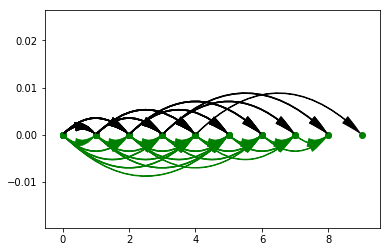

In [3]:
ims = []
for i in range(10):
    x += [i]
    y += [0]
    x2 = x[:-1]
    y2 = y[:-1]
    im = [plt.scatter(x, y, animated=True, c='g')]
    style="Simple, tail_width=0.5, head_width=8,head_length=20"
    kw = dict(arrowstyle=style, color="k")
    kw2 = dict(arrowstyle=style, color="g")


    for i in range(len(x)):
        if i==0:
            continue

        a = patches.FancyArrowPatch((x[(i-1)>>1], y[(i-1)>>1]), (x[i], y[i]), connectionstyle="arc3,rad=-0.5", **kw)
        a1 = plt.gca().add_patch(a)
        im.append(a1)

    for i in range(len(x2)):
        if i==0:
            continue

        a = patches.FancyArrowPatch((x2[-1-i], y2[-1-i]), (x2[-1-(i-1)>>1], y2[-1-(i-1)>>1]), connectionstyle="arc3,rad=0.5", **kw2)
        a2 = plt.gca().add_patch(a)
        im.append(a2)

    ims.append(im)

In [4]:
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                repeat_delay=0)
# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

In [5]:
plt.show()

# Python graph

[0, 0, -0.11363636363636363, 0.11363636363636363, -0.1652892561983471, -0.06198347107438017, 0.06198347107438017, 0.1652892561983471, -0.18876784372652142, -0.1418106686701728] [0, -0.1418106686701728, -0.18876784372652142, 0.1652892561983471, 0.06198347107438017, -0.06198347107438017, -0.1652892561983471, 0.11363636363636363, -0.11363636363636363, 0, 0]


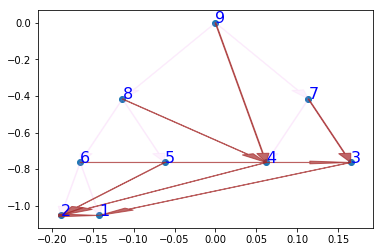

In [6]:
import matplotlib.pyplot as plt
import random
import math


n = 9
x = [0] * (n+1)
y = [0] * (n+1)
dx = 0.5
dy = 0.5
for i in range(n+1):
    if i==0 or i==1:
        continue
    if int(math.log(i, 2)) == math.log(i, 2):
        dx /= 2.2
        dy /= 1.2
    y[i] = y[i>>1] - dy
    x[i] = x[i>>1] + i%2 * dx - 0.5*dx
    
xx = [0]+x[::-1]
yy = [0]+y[::-1]
print(x, xx)
plt.scatter(x[1:],y[1:])
#plt.plot(x[1:],y[1:])
for i in range(1, n+1):
    plt.text(x[i],y[i], n+1-i, fontsize='16', color='blue')
    if i>>1 > 0:
        plt.arrow(x[i>>1],y[i>>1], -x[i>>1]+x[i], -y[i>>1]+y[i],  color='violet', alpha=0.1, head_width=0.015, head_length=0.05, length_includes_head= True)
for i in range(1, n+1):
    #plt.text(x[i],y[i], i)
    if i>>1 > 0:
        plt.arrow(xx[i],yy[i], xx[i>>1]-xx[i], yy[i>>1]-yy[i],  color='brown', alpha=0.7, head_width=0.015, head_length=0.05, length_includes_head= True)

plt.show()


# Python cl

In [7]:
import itertools

class Heap():
    nodes = []

    def __str__(self):
        return str([i.value for i in self.nodes])


heap = Heap()


class Node():

    def __init__(self, value):
        self.value = value
        self.k = len(heap.nodes)
        heap.nodes.append(self)

    def __str__(self):
        return "(v:{},k:{})".format(self.value, self.k)

    @classmethod
    def get_n(cls):
        return len(heap.nodes)

    def father(self):
        if self.k == 0:
            return None
        else:
            return heap.nodes[(self.k-1)//2]

    def boys(self):
        res = None
        k = self.k
        if 2*k+2 < self.n:
            res = [heap.nodes[2*k+1], heap.nodes[2*k+2]]
        elif 2*k+1 < self.n:
            res = [heap.nodes[2*k+1]]
        return res

    def get_mk(self):
        return self.n - self.k-1

    @property
    def n(self):
        return  self.get_n()

    @property
    def mk(self):
        return self.get_mk()

    def mother(self):

        if self.mk == 0:
            return None
        else:
            return heap.nodes[self.n - (self.mk-1)//2 - 1]

    def girls(self):
        res = None
        k = self.mk
        if 2*k+2 < self.n:
            res = [heap.nodes[2*k+1], heap.nodes[2*k+2]]
        elif 2*k+1 < self.n:
            res = [heap.nodes[self.n -1-2*k+1]]
        return res


a = Node(2)
b = Node(5)
c = Node(3)

print(heap)
print(c.girls())


def father(i, n=None):
    if i==0:
        return None
    return (i-1)>>1


def check_max(arr):
    "is array a max-heap"
    res = True
    for i in range(len(arr)):
        if father(i) is not None and arr[i] > arr[father(i)]:
            res = False
            break
    return res


def check_min(arr):
    "is array a min-heap"
    res = True
    for i in range(len(arr)):
        if father(i) is not None and arr[-1-i] < arr[-1-father(i)]:
            res = False
            break
    return res

z = 6


summ = 0
for i in itertools.permutations([i for i in range(1,z-1)]):
    a = [z-1]+list(i)+[0]
    if check_min(a)*check_max(a):
        print(a, check_min(a)*check_max(a))
    summ += check_min(a)*check_max(a)

print(summ)

[2, 5, 3]
[<__main__.Node object at 0x7fc9e820c828>, <__main__.Node object at 0x7fc9e820c7f0>]
[5, 3, 4, 1, 2, 0] 1
[5, 3, 4, 2, 1, 0] 1
[5, 4, 2, 3, 1, 0] 1
[5, 4, 3, 1, 2, 0] 1
[5, 4, 3, 2, 1, 0] 1
5


# Python min-max

In [8]:
class MinMax():
    def __init__(self):
        self.x = []
        self.a = []
        self.b = []

    
    def __str__(self):
        return (str(self.a[::-1])+'\n'+str(self.b))

    def insert(self, x):
        self.x.append(x)

        k = len(self.a)
        self.a.append(x)
        while self.parent(k) is not None and self.a[k] > self.a[self.parent(k)]:
            self.a[k], self.a[self.parent(k)], k = self.a[self.parent(k)], self.a[k], self.parent(k)

        l = len(self.b)
        self.b.append(x)
        while self.parent(l) is not None and self.b[l] < self.b[self.parent(l)]:
            self.b[l], self.b[self.parent(l)], l = self.b[self.parent(l)], self.b[l], self.parent(l)


    def pop(self):
        if len(self.a) == 0:
            return None
        res = self.a[0]
        self.a[0] = self.a[-1]
        self.a.pop()
        k = 0
        while self.childrens(k) is not None and self.a[k] < max([self.a[ch] for ch in self.childrens(k)]):
            if self.a[self.childrens(k)[0]] == max([self.a[ch] for ch in self.childrens(k)]):
                self.a[k], self.a[2*k+1], k = self.a[2*k+1], self.a[k], 2*k+1
            else:
                self.a[k], self.a[2*k+2], k = self.a[2*k+2], self.a[k], 2*k+2


    def parent(self, n):
        if n==0:
            return None
        return (n-1)//2

    def childrens(self, n):
        res = None
        if 2*n+2 < len(self.a):
            res = [2*n+1, 2*n+2]
        elif 2*n+1 < len(self.a):
            res = [2*n+1]
        return res

            


c = MinMax()
c.insert(1)
c.insert(3)
c.insert(5)
c.insert(0)
# c.add(5)

print(c)


[0, 3, 1, 5]
[0, 1, 5, 3]


# Python newgr

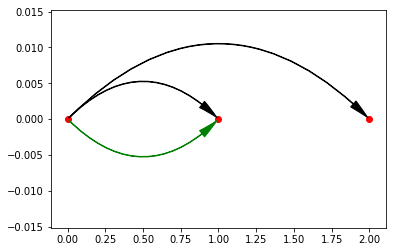

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


n= 3
x = [i for i in range(n)]
y = [0] * n
x2 = x[:-1]
y2 = y[:-1]
plt.scatter(x,y, c='r')





style="Simple, tail_width=0.5, head_width=8,head_length=20"
kw = dict(arrowstyle=style, color="k")
kw2 = dict(arrowstyle=style, color="g")


for i in range(len(x)):
    if i==0:
        continue

    a = patches.FancyArrowPatch((x[(i-1)>>1], y[(i-1)>>1]), (x[i], y[i]), connectionstyle="arc3,rad=-0.5", **kw)
    plt.gca().add_patch(a)

for i in range(len(x2)):
    if i==0:
        continue

    a = patches.FancyArrowPatch((x2[-1-i], y2[-1-i]), (x2[-1-(i-1)>>1], y2[-1-(i-1)>>1]), connectionstyle="arc3,rad=0.5", **kw2)
    plt.gca().add_patch(a)

plt.show()

# Clojure

In [1]:
%classpath config resolver jitpack.io https://jitpack.io
%classpath add mvn com.github.twosigma:ipyvolume:lmitusinski~beakerx-widget-SNAPSHOT
(import ipyvolume.PyLab)

(defn ball 
    [size radius]
    (let [data           (make-array Float/TYPE size size size)
          square         #(* % %)
          center         #(- % (/ size 2))
          sum            (partial reduce +)
          sum-of-squares #(sum (map square %))]
        (doseq [i (range size)
                j (range size)
                k (range size)
                :let [[x y z] (map center [i j k])] 
                :when (> (square radius) 
                         (sum-of-squares [x y z]))]
             (aset data i j k (float 1)))
        data))
(PyLab/volShow (ball 32 12))

In [3]:
(import ipyvolume.PyLab)

(defn ball 
    [size radius]
    (let [data           (make-array Float/TYPE size size size)
          square         #(* % %)
          center         #(- % (/ size 2))
          sum            (partial reduce +)
          sum-of-squares #(sum (map square %))]
        (doseq [i (range size)
                j (range size)
                k (range size)
                :let [[x y z] (map center [i j k])] 
                :when (> (square radius) 
                         (sum-of-squares [x y z]))]
             (aset data i j k (float 1)))
        data))
(PyLab/volShow (ball 32 12))